In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

rmstable2 = pd.read_csv('rmstable2.csv')

In [2]:
minind = np.where(rmstable2['rms'] == np.min(rmstable2['rms']))[0]
rmstable2['x'].loc[minind],rmstable2['y'].loc[minind],rmstable2['contrast'].loc[minind]

(690    75.8
 Name: x, dtype: float64,
 690    90.7
 Name: y, dtype: float64,
 690    5.6
 Name: contrast, dtype: float64)

In [5]:
xind = np.where( (rmstable2['y'] == rmstable2['y'].loc[minind].item()) &
              (rmstable2['contrast'] == rmstable2['contrast'].loc[minind].item()))[0]

<IPython.core.display.Javascript object>


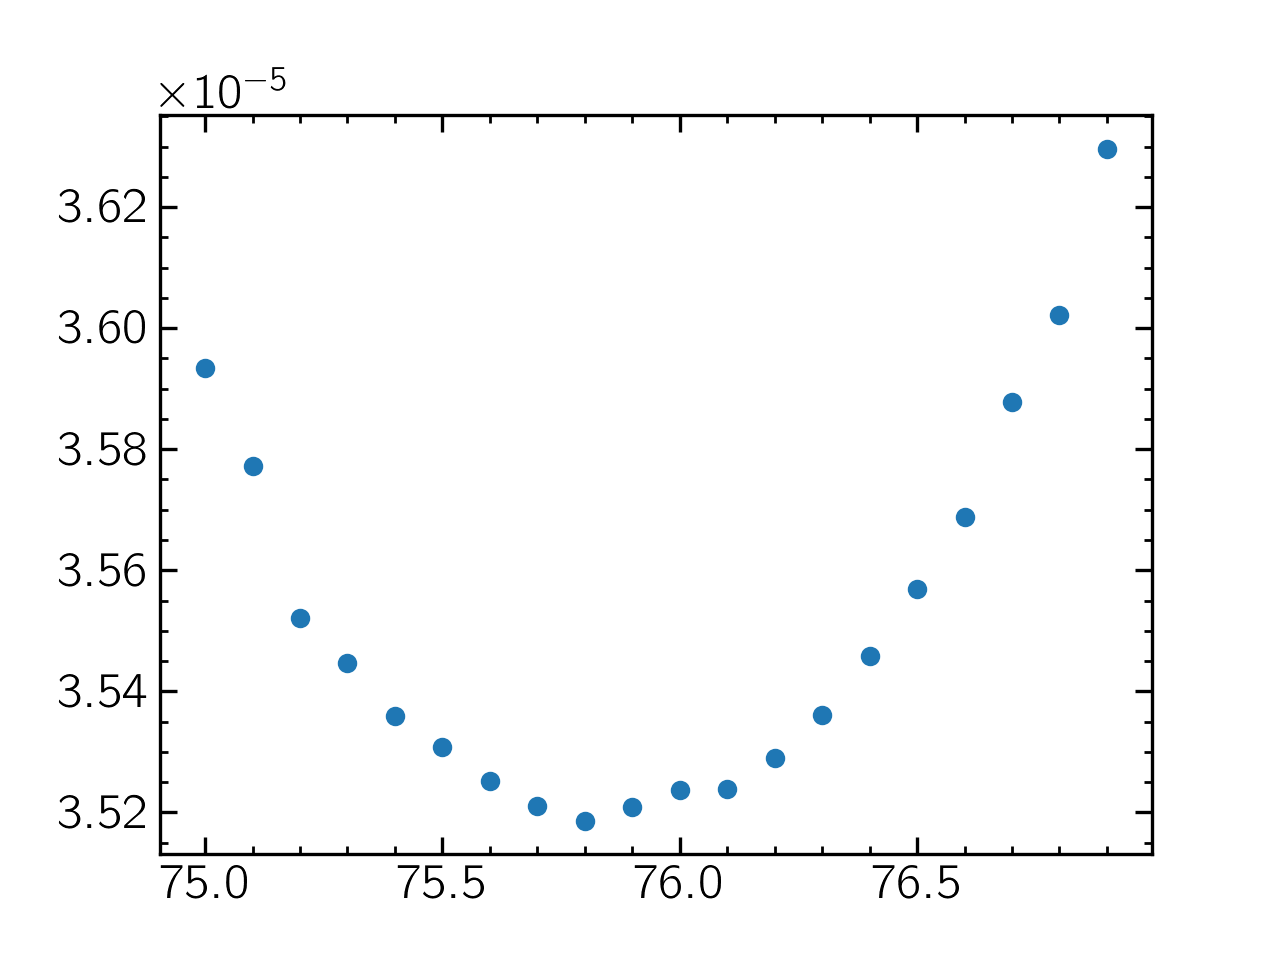

In [6]:
%matplotlib inline
plt.scatter(rmstable2['x'].loc[xind],rmstable2['rms'].loc[xind])

In [29]:
def parabola(x, a, h, k):
    return a*((x - h)**2) + k
def gaussian(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

from scipy.optimize import curve_fit
popt, pcov = curve_fit(parabola, rmstable2['x'].loc[xind],rmstable2['rms'].loc[xind])

<IPython.core.display.Javascript object>


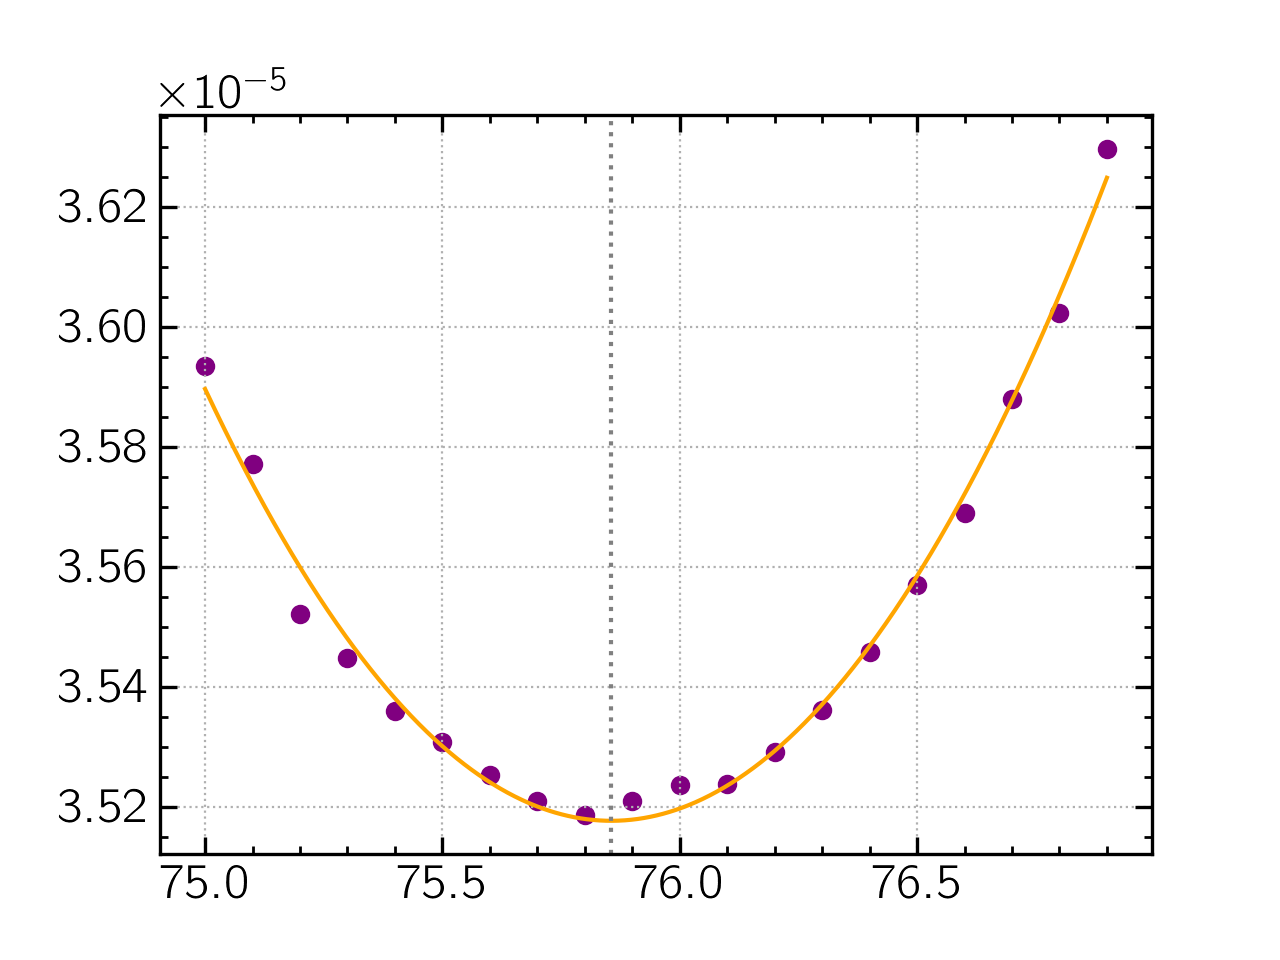

[75.85585586]


In [30]:
xnew = np.linspace(np.min(rmstable2['x'].loc[xind]), np.max(rmstable2['x'].loc[xind]), 1000)
ynew = parabola(xnew, *popt)


%matplotlib notebook
plt.scatter(rmstable2['x'].loc[xind],rmstable2['rms'].loc[xind],color='purple')
plt.plot(xnew,ynew, color='orange')
plt.grid(ls=':')
print(xnew[np.where(ynew == np.min(ynew))])
plt.axvline(x = xnew[np.where(ynew == np.min(ynew))], ls=':', color='grey')

In [31]:
rmstable = pd.read_csv('rmstable.csv')

<IPython.core.display.Javascript object>


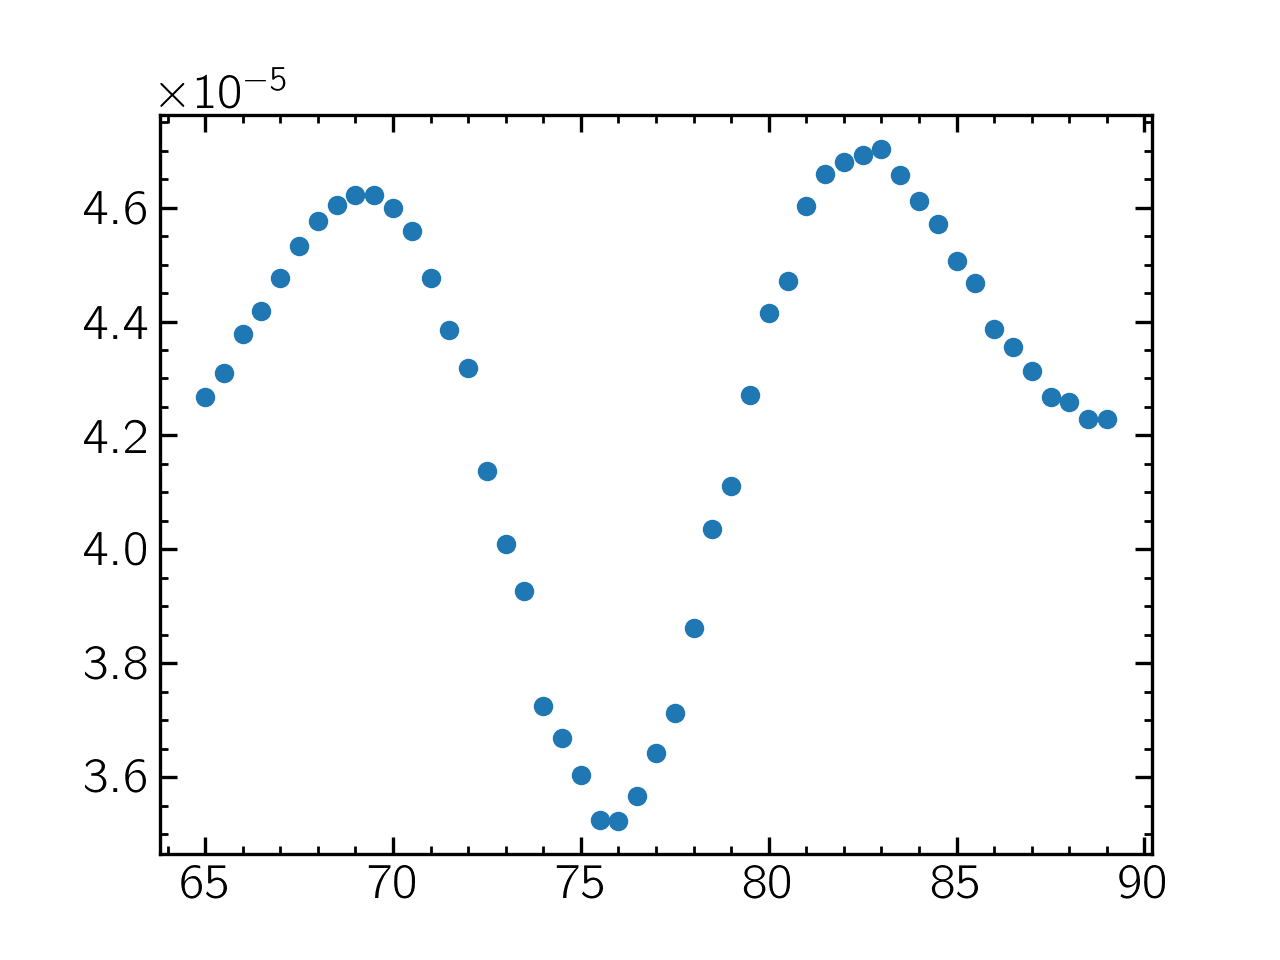

In [33]:
minind = np.where(rmstable['rms'] == np.min(rmstable['rms']))[0]
rmstable['x'].loc[minind],rmstable['y'].loc[minind],rmstable['contrast'].loc[minind]

xind = np.where( (rmstable['y'] == rmstable['y'].loc[minind].item()) &
              (rmstable['contrast'] == rmstable['contrast'].loc[minind].item()))[0]
%matplotlib
plt.scatter(rmstable['x'].loc[xind],rmstable['rms'].loc[xind])

<IPython.core.display.Javascript object>


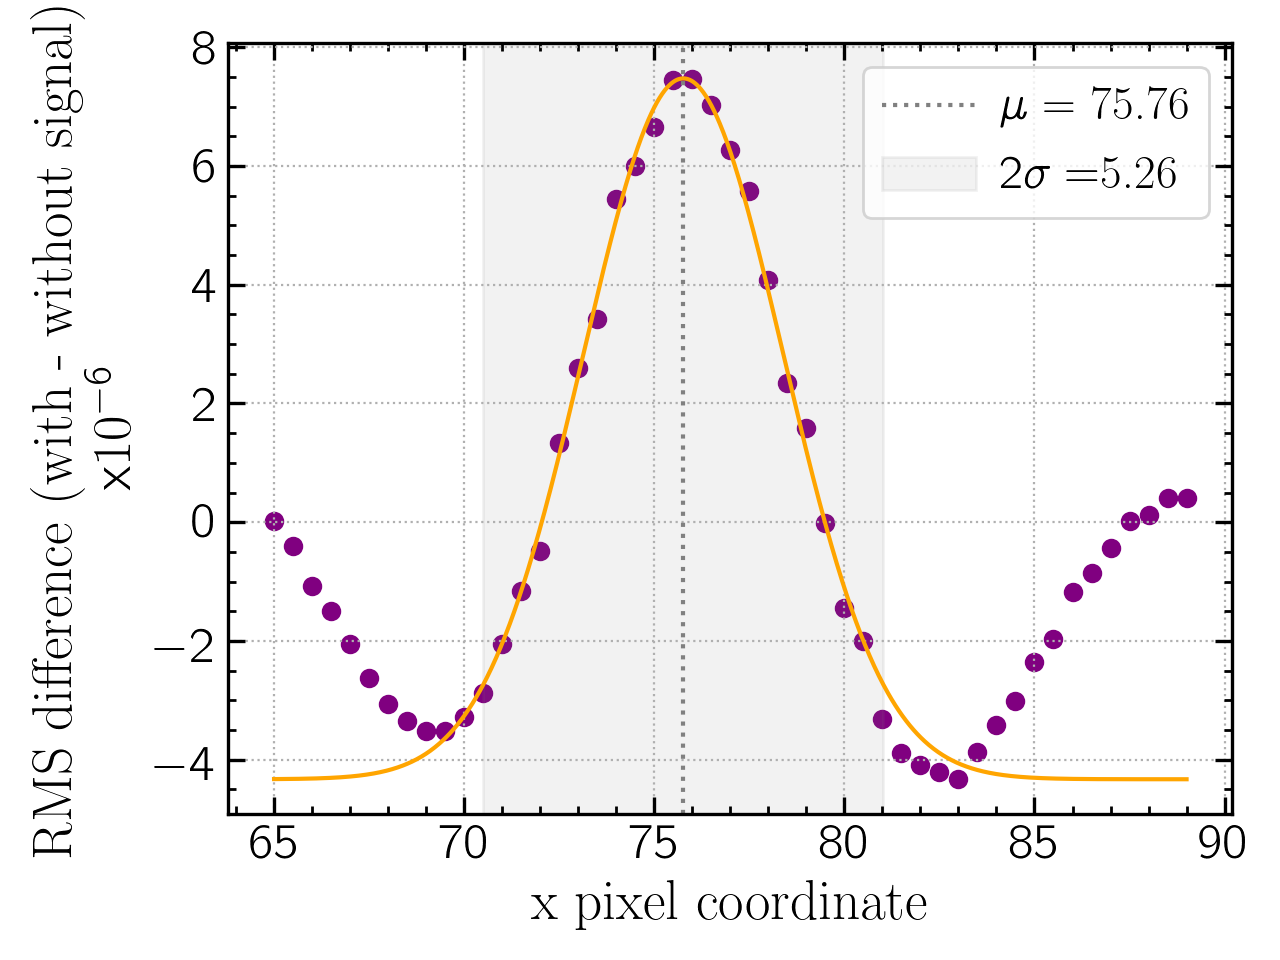

In [121]:
xarray = np.array(rmstable['x'].loc[xind])
xrmsarray = np.array(rmstable['rms'].loc[xind])
fitind = np.where((xarray > 68.0) & (xarray < 83.5))[0]

popt, pcov = curve_fit(parabola, xarray[fitind], xrmsarray[fitind])

xnewp = np.linspace(np.min(xarray[fitind]), np.max(xarray[fitind]), 1000)
ynewp = parabola(xnewp, *popt)



rms_with_planet = 4.332383239738482e-05
diff = rms_with_planet - xrmsarray
diff = diff*1e6

g_init = models.Gaussian1D(amplitude=8, mean=75.7, stddev=1.)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, xarray, diff-np.min(diff))

xnew = np.linspace(np.min(xarray), np.max(xarray), 1000)

%matplotlib notebook
plt.scatter(xarray,(diff-np.min(diff))-rms_with_planet*1e5,color='purple')
plt.plot(xnew,g(xnew)-rms_with_planet*1e5,color='orange')
plt.axvline(x = g.mean.value, color='grey',ls=':', label='$\mu$ = {:.2f}'.format(g.mean.value))
plt.axvspan(g.mean.value - 2*g.stddev.value, g.mean.value+2*g.stddev.value, color='grey',
            alpha=0.1,label='$2\sigma = ${:.2f}'.format(2*g.stddev.value))
plt.grid(ls=':')
plt.xlabel('x pixel coordinate')
plt.ylabel('RMS difference (with - without signal) \n $\mathrm{x}$10$^{-6}$')
plt.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


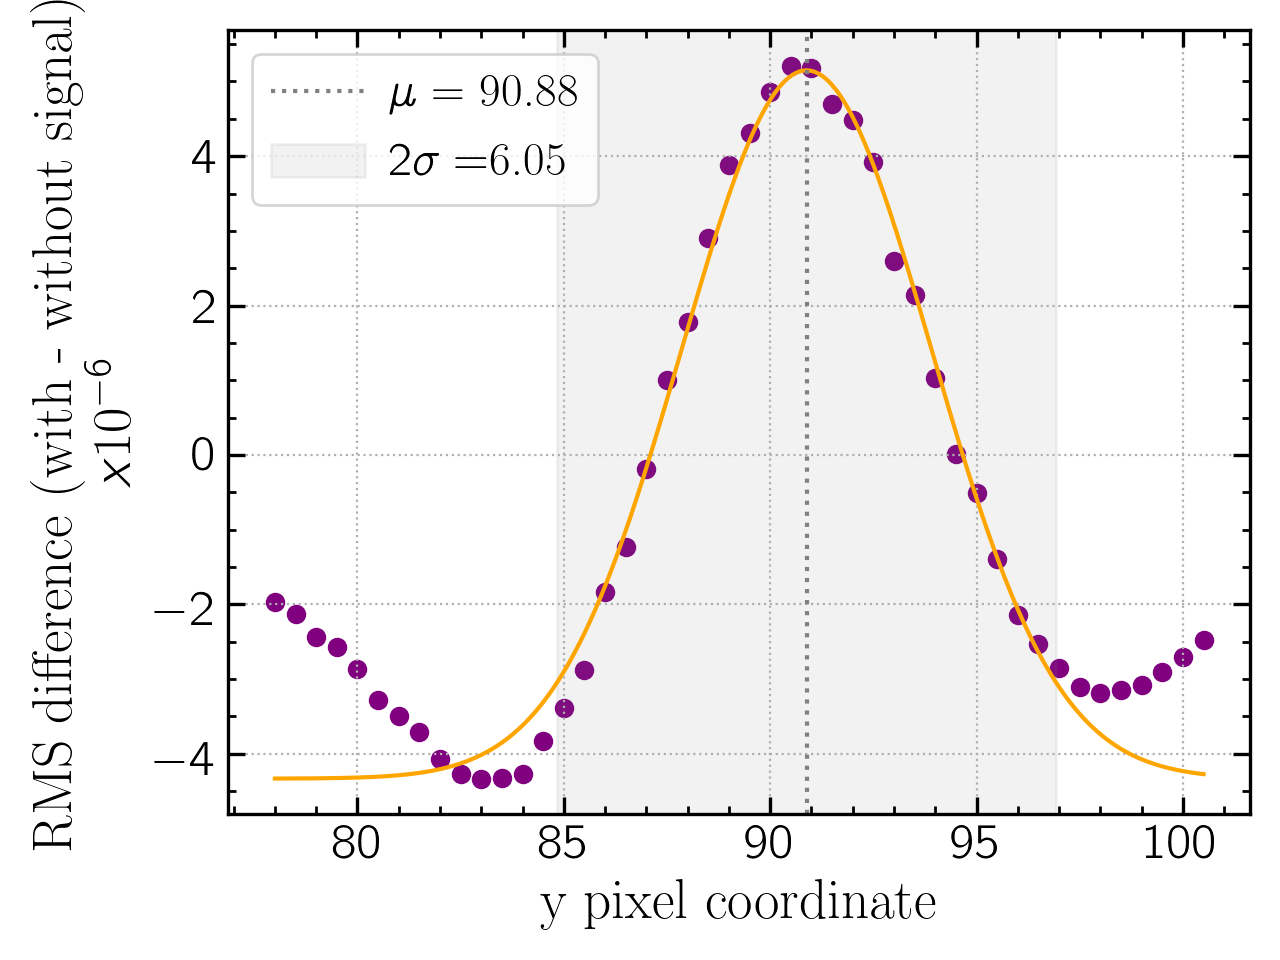

In [98]:
yind = np.where( (rmstable['x'] == rmstable['x'].loc[minind].item()) &
              (rmstable['contrast'] == rmstable['contrast'].loc[minind].item()))[0]


yarray = np.array(rmstable['y'].loc[yind])
yrmsarray = np.array(rmstable['rms'].loc[yind])
#fitind = np.where((yarray > 68.0) & (yarray < 83.5))[0]

#popt, pcov = curve_fit(parabola, xarray[fitind], xrmsarray[fitind])
#xnewp = np.linspace(np.min(xarray[fitind]), np.max(xarray[fitind]), 1000)
#ynewp = parabola(xnewp, *popt)



rms_with_planet = 4.332383239738482e-05
diff = rms_with_planet - yrmsarray
diff = diff*1e6

g_init = models.Gaussian1D(amplitude=8, mean=90.5, stddev=1.)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, yarray, diff-np.min(diff))

ynew = np.linspace(np.min(yarray), np.max(yarray), 1000)

%matplotlib notebook
plt.scatter(yarray,(diff-np.min(diff))-rms_with_planet*1e5,color='purple')
plt.plot(ynew,g(ynew)-rms_with_planet*1e5,color='orange')
plt.axvline(x = g.mean.value, color='grey',ls=':', label='$\mu$ = {:.2f}'.format(g.mean.value))
plt.axvspan(g.mean.value - 2*g.stddev.value, g.mean.value+2*g.stddev.value, color='grey',
            alpha=0.1,label='$2\sigma = ${:.2f}'.format(2*g.stddev.value))
plt.grid(ls=':')
plt.xlabel('y pixel coordinate')
plt.ylabel('RMS difference (with - without signal) \n $\mathrm{x}$10$^{-6}$')
plt.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


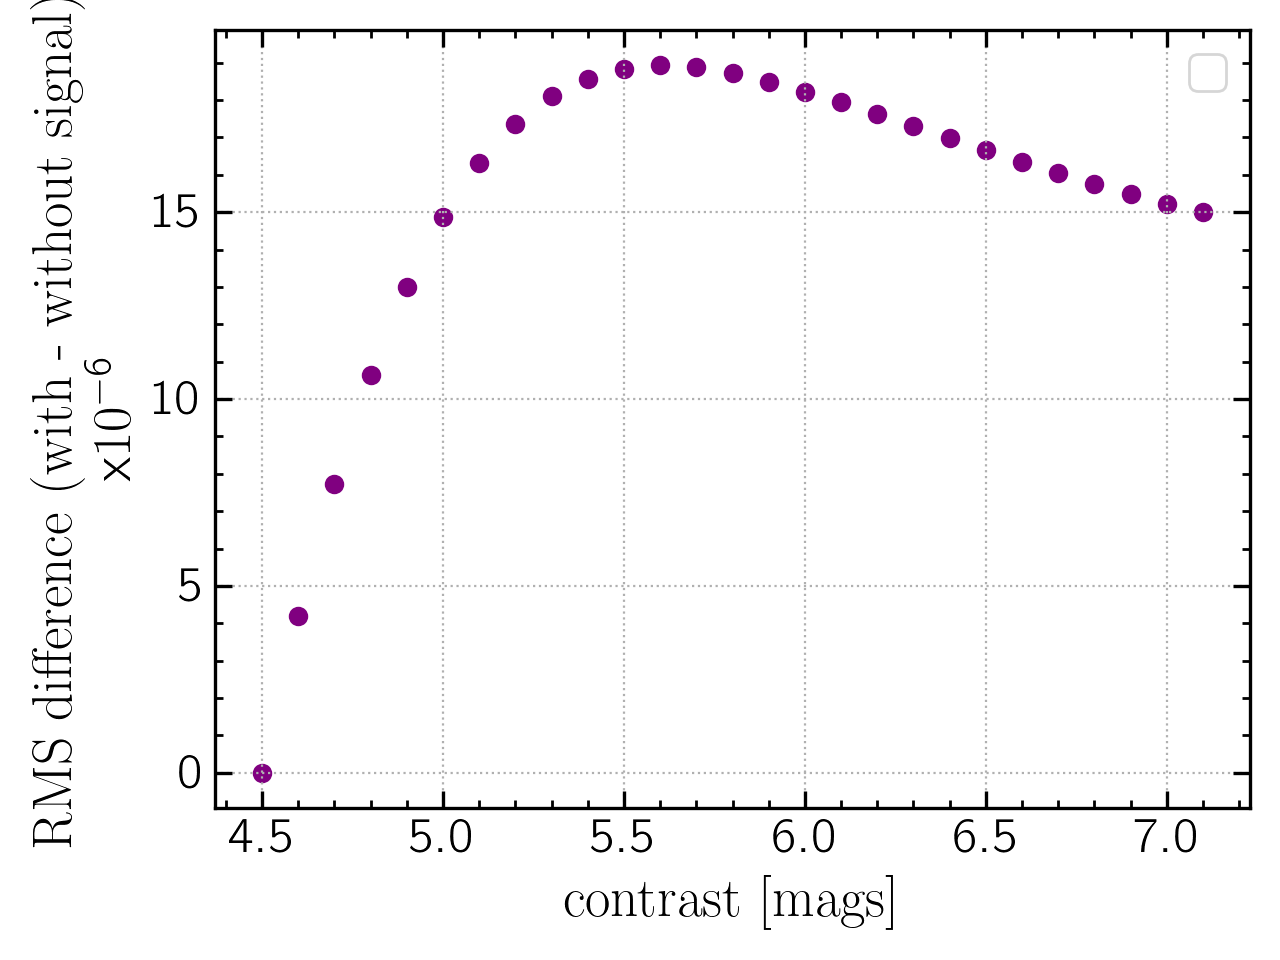

No handles with labels found to put in legend.


In [153]:
cind = np.where( (rmstable['x'] == rmstable['x'].loc[minind].item()) &
              (rmstable['y'] == rmstable['y'].loc[minind].item()))[0]


carray = np.array(rmstable['contrast'].loc[cind])
crmsarray = np.array(rmstable['rms'].loc[cind])
fitind = np.where((carray > 5.2) & (carray < 6.0))[0]

rms_with_planet = 4.332383239738482e-05
diff = rms_with_planet - crmsarray
diff = diff*1e6

popt, pcov = curve_fit(parabola, carray[fitind], diff[fitind]-np.min(diff))
cnewp = np.linspace(np.min(carray[fitind]), np.max(carray[fitind]), 1000)


g_init = models.Gaussian1D(amplitude=14.6, mean=5.6, stddev=1.)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, carray[fitind], diff[fitind]-np.min(diff))

cnew = np.linspace(np.min(carray[fitind]), np.max(carray[fitind]), 1000)

%matplotlib inline
plt.scatter(carray,(diff-np.min(diff)),color='purple')
#plt.plot(cnewp,parabola(cnewp, *popt)-rms_with_planet*1e5,color='orange')
#plt.plot(cnew,g(cnewp)-rms_with_planet*1e5,color='orange')
#plt.axvline(x = g.mean.value, color='grey',ls=':', label='$\mu$ = {:.2f}'.format(g.mean.value))
#plt.axvspan(g.mean.value - g.stddev.value, g.mean.value+g.stddev.value, color='grey',
#            alpha=0.1,label='$\sigma = ${:.2f}'.format(g.stddev.value))
plt.grid(ls=':')
plt.xlabel('contrast [mags]')
plt.ylabel('RMS difference (with - without signal) \n $\mathrm{x}$10$^{-6}$')
plt.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


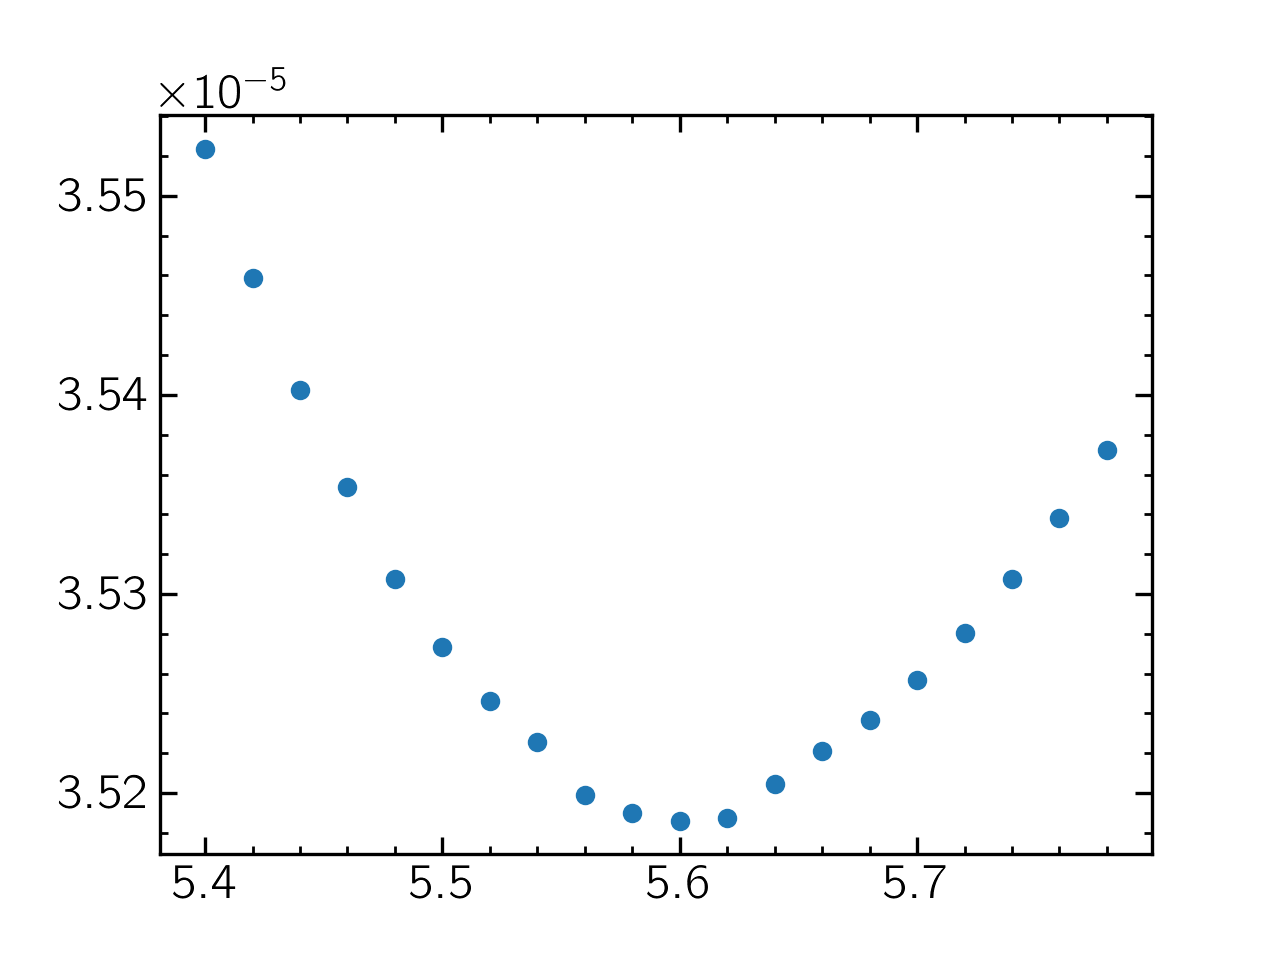

In [138]:
rmstable2 = pd.read_csv('rmstable2.csv')
minind2 = np.where(rmstable2['rms'] == np.min(rmstable2['rms']))[0]
fitind = np.where( (rmstable2['y'] == rmstable2['y'].loc[minind2].item()) &
              (rmstable2['x'] == rmstable2['x'].loc[minind2].item()))[0]
%matplotlib notebook
plt.scatter(rmstable2['contrast'].loc[fitind],rmstable2['rms'].loc[fitind])

<IPython.core.display.Javascript object>


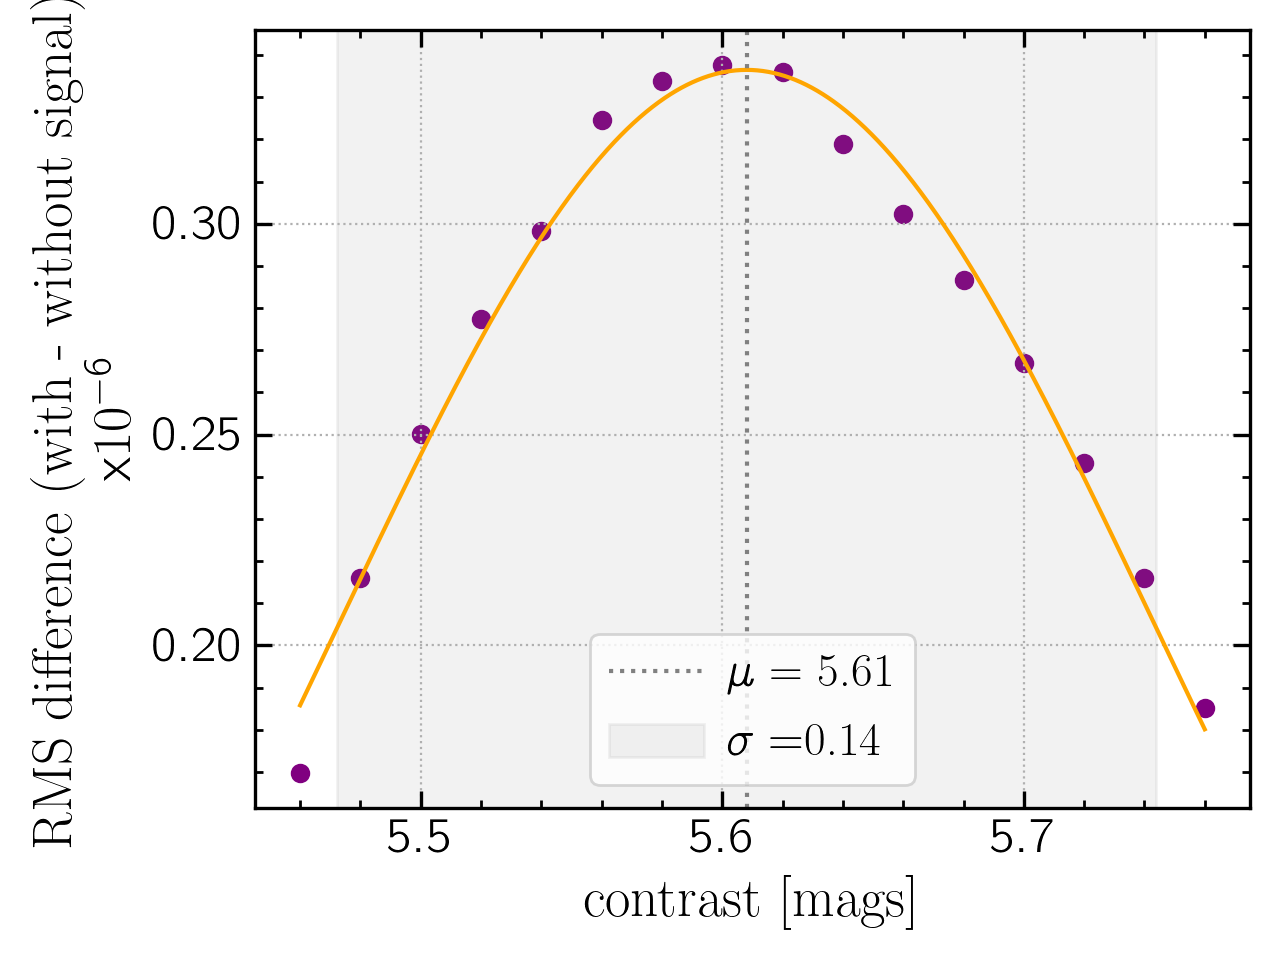

In [145]:
cind = np.where( (rmstable2['y'] == rmstable2['y'].loc[minind2].item()) &
              (rmstable2['x'] == rmstable2['x'].loc[minind2].item()))[0]

carray = np.array(rmstable2['contrast'].loc[cind])
crmsarray = np.array(rmstable2['rms'].loc[cind])
fitind = np.where((carray > 5.45) & (carray < 5.76))[0]

rms_with_planet = 4.332383239738482e-05
diff = rms_with_planet - crmsarray
diff = diff*1e6


g_init = models.Gaussian1D(amplitude=14.6, mean=5.6, stddev=1.)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, carray[fitind], diff[fitind]-np.min(diff))

cnew = np.linspace(np.min(carray[fitind]), np.max(carray[fitind]), 1000)

%matplotlib notebook
plt.scatter(carray[fitind],(diff[fitind]-np.min(diff)),color='purple')
#plt.plot(cnewp,parabola(cnewp, *popt)-rms_with_planet*1e5,color='orange')
plt.plot(cnew,g(cnew),color='orange')
plt.axvline(x = g.mean.value, color='grey',ls=':', label='$\mu$ = {:.2f}'.format(g.mean.value))
plt.axvspan(g.mean.value - g.stddev.value, g.mean.value+g.stddev.value, color='grey',
            alpha=0.1,label='$\sigma = ${:.2f}'.format(g.stddev.value))
plt.grid(ls=':')
plt.xlabel('contrast [mags]')
plt.ylabel('RMS difference (with - without signal) \n $\mathrm{x}$10$^{-6}$')
plt.legend()
plt.tight_layout()

# Combined plot

<IPython.core.display.Javascript object>


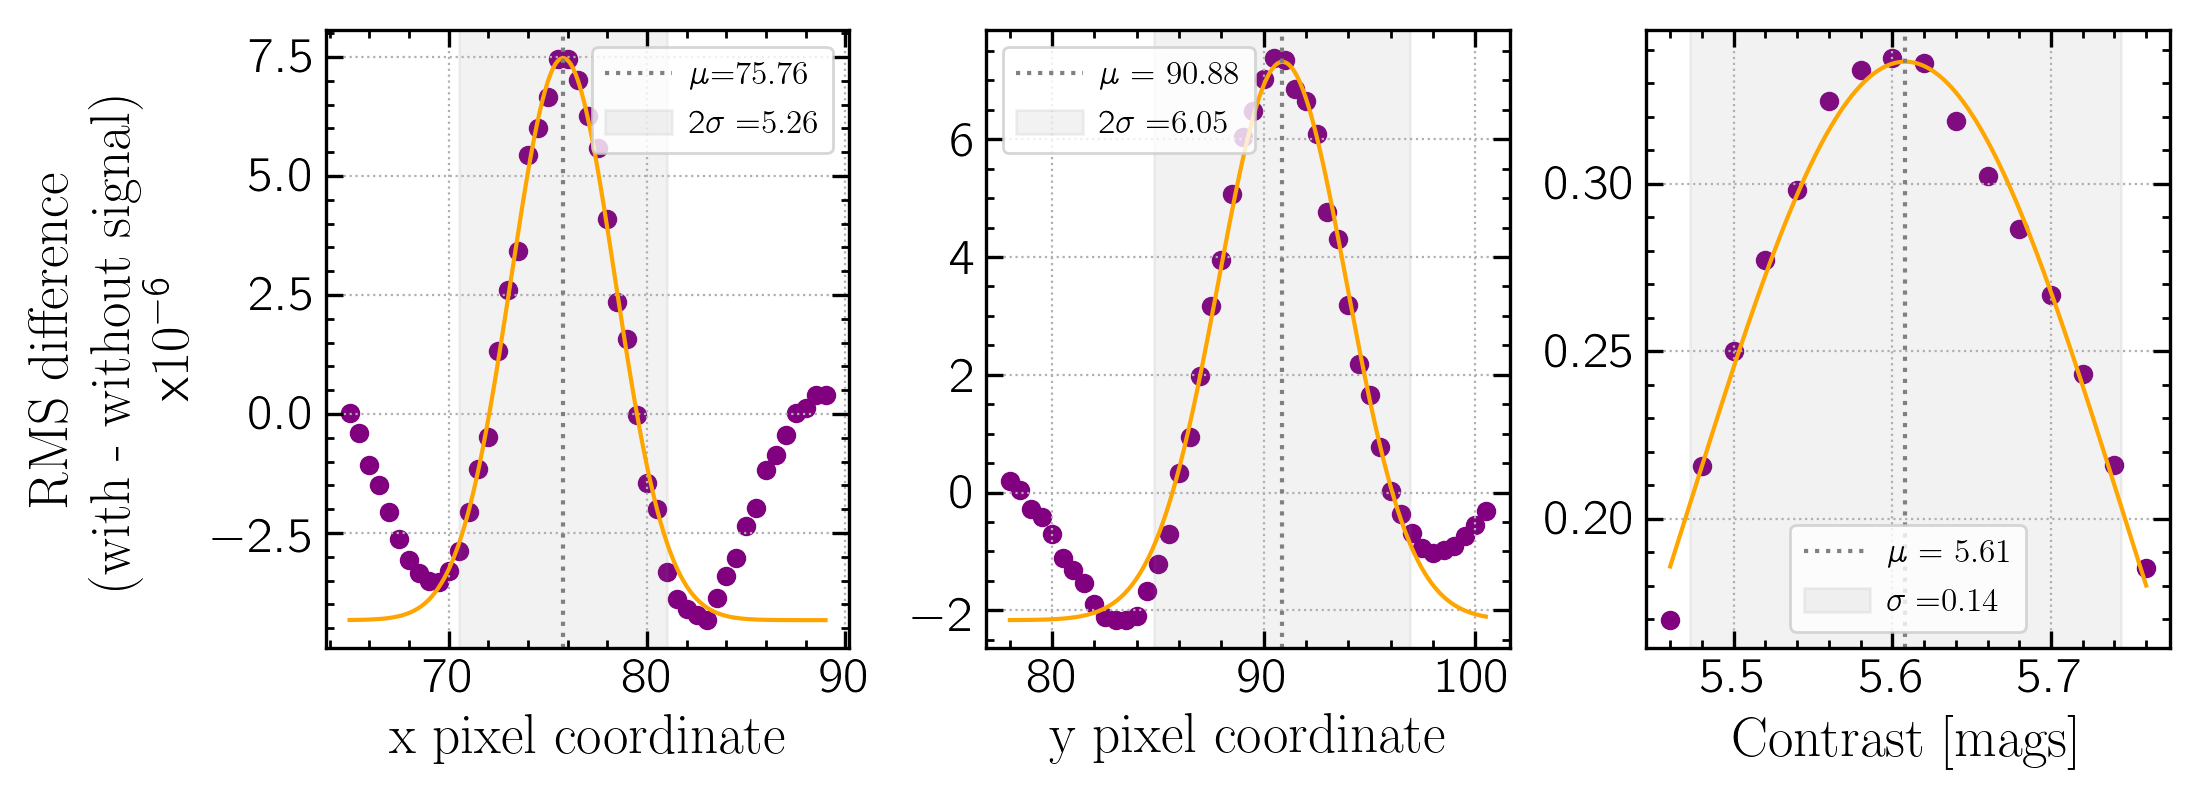

In [151]:
rms_with_planet = 4.332383239738482e-05

xarray = np.array(rmstable['x'].loc[xind])
xrmsarray = np.array(rmstable['rms'].loc[xind])
fitind = np.where((xarray > 68.0) & (xarray < 83.5))[0]
popt, pcov = curve_fit(parabola, xarray[fitind], xrmsarray[fitind])
xnewp = np.linspace(np.min(xarray[fitind]), np.max(xarray[fitind]), 1000)
ynewp = parabola(xnewp, *popt)
diff = rms_with_planet - xrmsarray
diff = diff*1e6

g_init = models.Gaussian1D(amplitude=8, mean=75.7, stddev=1.)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, xarray, diff-np.min(diff))
xnew = np.linspace(np.min(xarray), np.max(xarray), 1000)

%matplotlib notebook
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(11,4))
gs = gridspec.GridSpec(nrows=1, ncols=3)

ax1 = fig.add_subplot(gs[0])
ax1.scatter(xarray,(diff-np.min(diff))-rms_with_planet*1e5,color='purple')
ax1.plot(xnew,g(xnew)-rms_with_planet*1e5,color='orange')
ax1.axvline(x = g.mean.value, color='grey',ls=':', label='$\mu$={:.2f}'.format(g.mean.value))
ax1.axvspan(g.mean.value - 2*g.stddev.value, g.mean.value+2*g.stddev.value, color='grey',
            alpha=0.1,label='$2\sigma = ${:.2f}'.format(2*g.stddev.value))
ax1.grid(ls=':')
ax1.set_xlabel('x pixel coordinate')
ax1.set_ylabel('RMS difference \n (with - without signal) \n $\mathrm{x}$10$^{-6}$')
ax1.legend(fontsize=12, loc='upper right')


ax2 = fig.add_subplot(gs[1])
yind = np.where( (rmstable['x'] == rmstable['x'].loc[minind].item()) &
              (rmstable['contrast'] == rmstable['contrast'].loc[minind].item()))[0]
yarray = np.array(rmstable['y'].loc[yind])
yrmsarray = np.array(rmstable['rms'].loc[yind])
rms_with_planet = 4.332383239738482e-05/2
diff = rms_with_planet - yrmsarray
diff = diff*1e6
g_init = models.Gaussian1D(amplitude=8, mean=90.5, stddev=1.)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, yarray, diff-np.min(diff))
ynew = np.linspace(np.min(yarray), np.max(yarray), 1000)

ax2.scatter(yarray,(diff-np.min(diff))-rms_with_planet*1e5,color='purple')
ax2.plot(ynew,g(ynew)-rms_with_planet*1e5,color='orange')
ax2.axvline(x = g.mean.value, color='grey',ls=':', label='$\mu$ = {:.2f}'.format(g.mean.value))
ax2.axvspan(g.mean.value - 2*g.stddev.value, g.mean.value+2*g.stddev.value, color='grey',
            alpha=0.1,label='$2\sigma = ${:.2f}'.format(2*g.stddev.value))
ax2.grid(ls=':')
ax2.set_xlabel('y pixel coordinate')
ax2.legend(fontsize=12, loc='upper left')


ax3 = fig.add_subplot(gs[2])
cind = np.where( (rmstable2['y'] == rmstable2['y'].loc[minind2].item()) &
              (rmstable2['x'] == rmstable2['x'].loc[minind2].item()))[0]

carray = np.array(rmstable2['contrast'].loc[cind])
crmsarray = np.array(rmstable2['rms'].loc[cind])
fitind = np.where((carray > 5.45) & (carray < 5.76))[0]
rms_with_planet = 4.332383239738482e-05
diff = rms_with_planet - crmsarray
diff = diff*1e6
g_init = models.Gaussian1D(amplitude=14.6, mean=5.6, stddev=1.)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, carray[fitind], diff[fitind]-np.min(diff))
cnew = np.linspace(np.min(carray[fitind]), np.max(carray[fitind]), 1000)

ax3.scatter(carray[fitind],(diff[fitind]-np.min(diff)),color='purple')
ax3.plot(cnew,g(cnew),color='orange')
ax3.axvline(x = g.mean.value, color='grey',ls=':', label='$\mu$ = {:.2f}'.format(g.mean.value))
ax3.axvspan(g.mean.value - g.stddev.value, g.mean.value+g.stddev.value, color='grey',
            alpha=0.1,label='$\sigma = ${:.2f}'.format(g.stddev.value))
ax3.grid(ls=':')
ax3.set_xlabel('Contrast [mags]')
ax3.legend(fontsize=12, loc='lower center')


plt.tight_layout()
#plt.savefig('HIPC2015-grid-search-results.png', dpi=300, bbox_inches='tight')

# astrometry:

In [11]:
x = [75.75, 5.26]
y = [90.88, 6.05]
6.05*2*16
#6 mas/pix -> 12 pixels = 72 mas; 1 l/d = 117 mas
168.32/117, 193/117

(1.4386324786324787, 1.6495726495726495)

In [29]:
from myastrotools.tools import MonteCarloIt
dx = 89.5 - MonteCarloIt(x)
dy = 89.5 - MonteCarloIt(y)

#pa = (np.degrees(np.arctan2(x,-y)) ) % 360

seppix = np.sqrt(dx**2 + dy**2)
sep = seppix * 15.9
pa = (np.degrees(np.arctan2(dx,-dy))) % 360
np.mean(sep),np.std(sep), np.mean(pa), np.std(pa)

(241.89759290188456, 80.48374674006712, 85.64548879265716, 29.683870029859868)

In [30]:
#pickle.dump([MonteCarloIt(x),MonteCarloIt(y),dx,dy,sep,pa],open('2015-astrometry.pkl','wb'))

<IPython.core.display.Javascript object>


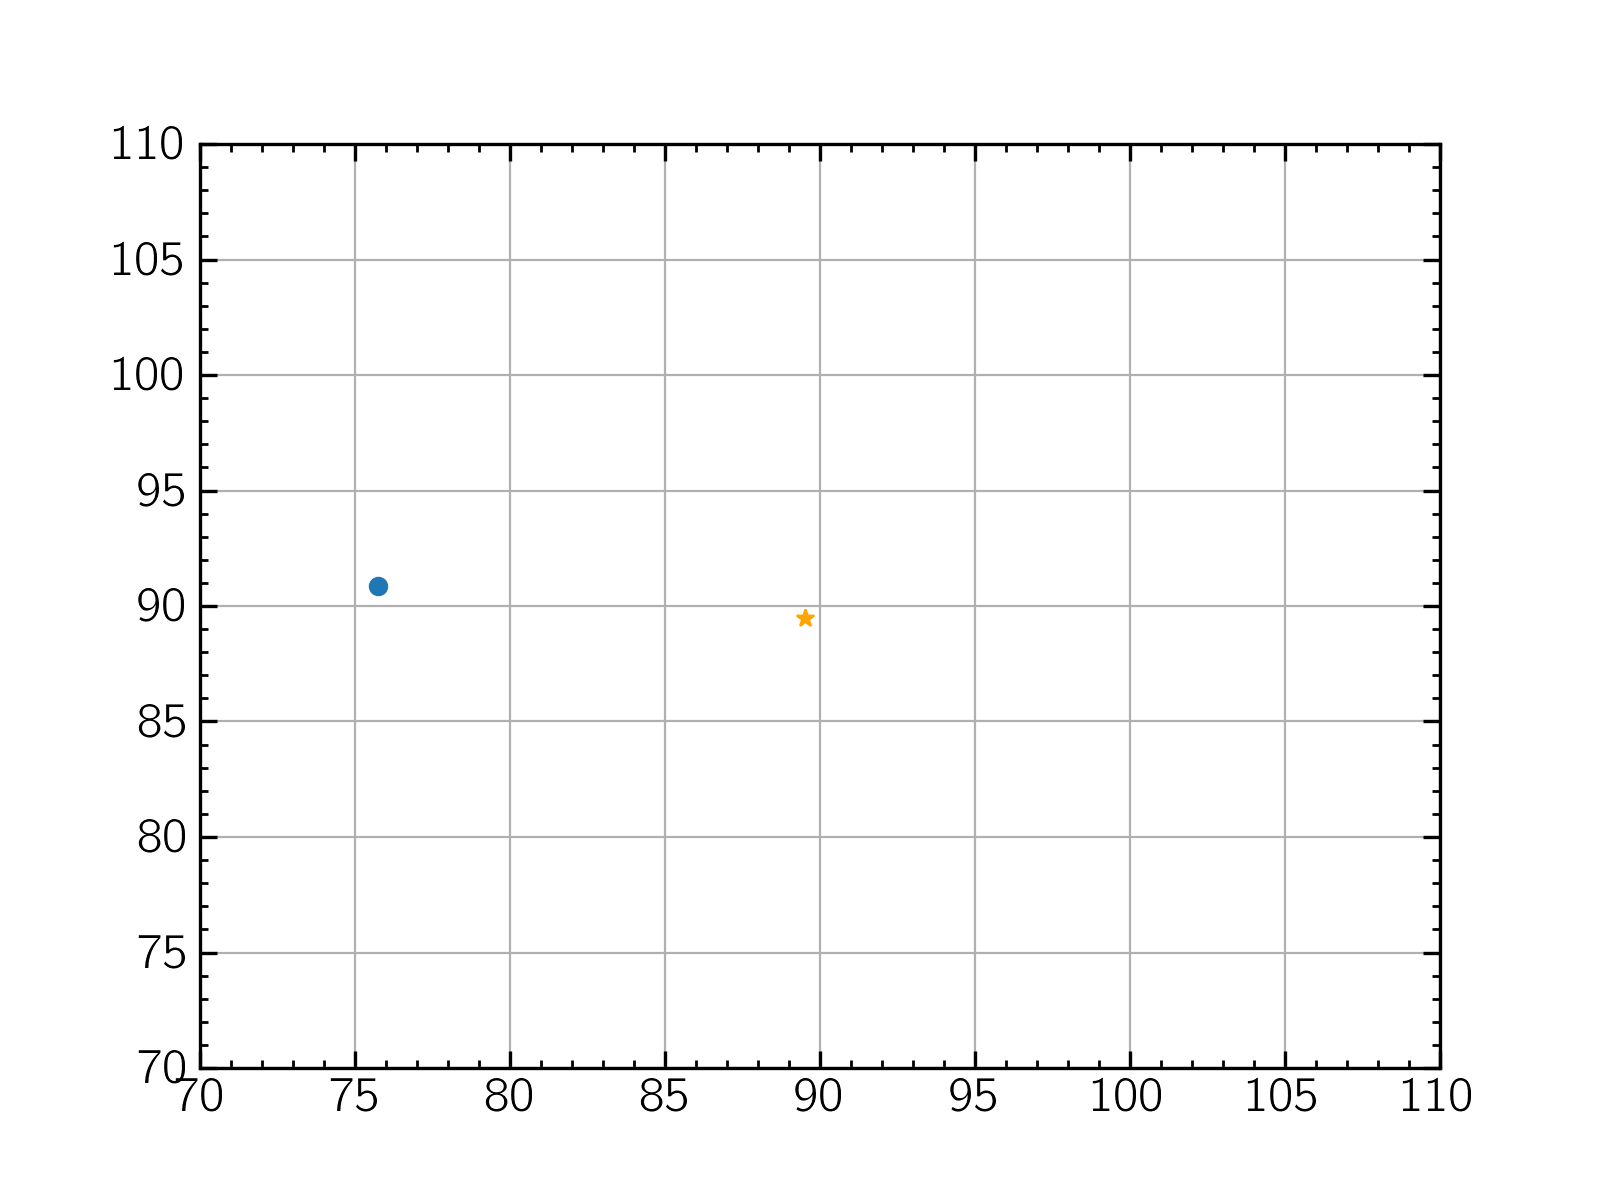

(70.0, 110.0)

In [27]:
%matplotlib inline
plt.scatter(89.5,89.5,marker='*', color='orange')
plt.scatter(x[0],y[0])
plt.xlim(70,110)
plt.ylim(70,110)